In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,100_ma,200_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,
1993-11-12,26.401390,26.489926,26.312854,26.330561,108200,25.829364,25.392783,1.0,0.004717,0.004717
1993-11-15,26.383690,26.454519,26.312861,26.454519,243300,25.840852,25.401569,1.0,0.004043,0.004043
1993-11-16,26.507641,26.525348,26.330569,26.436812,492600,25.853756,25.410715,1.0,0.008760,0.008760
1993-11-17,26.365978,26.525343,26.295150,26.525343,39600,25.862428,25.417847,1.0,0.003369,0.003369
1993-11-18,26.295155,26.383690,26.224326,26.330569,240800,25.871623,25.424104,1.0,0.000674,0.000674
...,...,...,...,...,...,...,...,...,...,...
2025-04-21,513.880005,521.700012,508.459991,521.159973,69368100,580.953814,570.276753,1.0,18.555936,5.399954
2025-04-22,527.250000,529.299988,519.190002,520.140015,75948100,580.308990,570.181571,1.0,19.064738,5.566467
2025-04-23,535.419983,545.429993,533.880005,540.429993,90590700,579.725795,570.111490,1.0,19.375650,5.668217


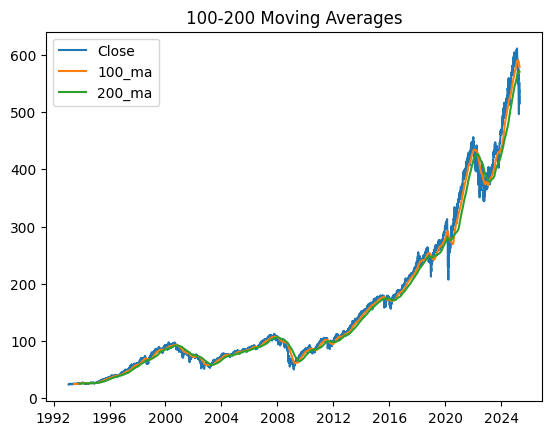

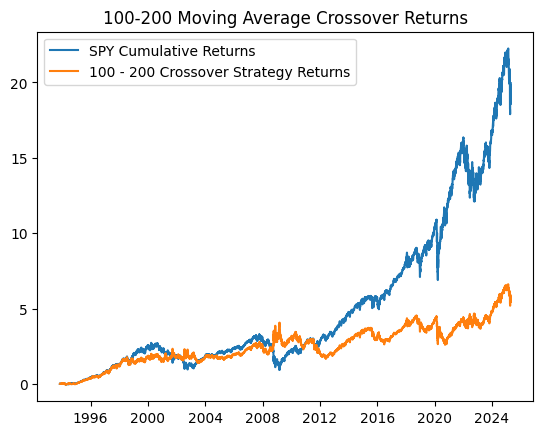

In [5]:
TICKER = 'SPY'
FAST = 100
SLOW = 200
LOOKBACK = 10000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{SLOW}_ma'] = df['Close'].rolling(slow).mean()

    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])
    plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])
    plt.title(f'{FAST}-{SLOW} Moving Averages');
    return df.dropna()

def add_strategy(df, fast, slow):
    
    # long when fast > slow, short otherwise
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, ticker, fast, slow):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1

    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{ticker} Cumulative Returns', f'{fast} - {slow} Crossover Strategy Returns'])
    plt.title(f'{FAST}-{SLOW} Moving Average Crossover Returns'); 

    return df.dropna()

def main():
    df = get_data()
    df = add_moving_averages(df, FAST, SLOW)
    df = add_strategy(df, FAST, SLOW)
    df = test_strategy(df, TICKER, FAST, SLOW)

    return df

main()